# 1 Setup & Load Data ---->>

    1.1 Import all dependencies ---->>

In [76]:
import tensorflow as tf
import os
import  cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np 

    1.2 Remove Dodgy Images ------>>>

In [77]:
data_dir = "Data"         # data folder in data_dir --->>>

In [78]:
os.listdir(data_dir)      # it will show all the folders present in the data directory ----->>>

['happy', 'sad']

In [79]:
os.listdir(os.path.join(data_dir,'happy'))      # It will show all the image present in the haappy data directory ----->>>

['05-12-21-happy-people.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL.jpg',
 '89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809ac32f.png',
 '8e06de1bf2171da2312b6de61c61e4bc--baby-essentials-baby-baby.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'compassion-900x387.jpg',
 'file-20230208-27-3jttof.jpg',
 'freedom-serenity-concept-female-model-ecstatic-enjoyment-mixed-race-34800382.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'getty_152414899_970460970

In [80]:
os.listdir(os.path.join(data_dir,'sad'))      # It will show all the image present in the sad data directory ----->>>

['-unhappy-miss-good-chance-dressed-casually-isolated-yellow-wall_273609-37534.jpg',
 '0x0.jpg',
 '1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg',
 '121129_sad-people-png.png',
 '121132_sad-people-png.png',
 '314071_2200-732x549.jpg',
 '360_F_548848756_IlV9Y9HV8chb6mSuc3PBamYRT9gIn8Vo.jpg',
 '360_F_573380015_l5YdjSZuJqET7UWOHBVMhzT7J63O8hPq.jpg',
 '360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg',
 '39843138-sad-man.jpg',
 '405-4050267_sad-people-png-sad-person-transparent-background-png.png',
 '5acf9ed1146e711e008b46d7.jpg',
 '73705bd7debb66c2afc780a22c223804.jpg',
 '7RNXwSxCAKL8vGtXG2ZkyD-1200-80.jpg',
 '8iAb9k4aT.jpg',
 'all-those-people-who-are-sad-17573-1.jpg',
 'anxious-man-indoors-front-view_23-2149729600.jpg',
 'blog-3.jpg',
 'cartoon-face-sad-negative-people-emotion-icon-vector-15011380.jpg',
 'clipart-resting-man-sad-person-silhouette-11562968626t91mbvbu9i.png',
 'crying-at-work.jpg',
 'dark-depression-mood-people-wallpaper-preview.jpg',
 'DealingwithDepressionwi

In [81]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [82]:
# Reading Image as a Numpy Array ------>>
img = cv2.imread(os.path.join('data','happy','_86a43964-aa8e-11e8-82d1-388e3d6e11aa.jpg'))

In [83]:
img.shape # image shape (height , width , channels_RGB) -------->>>>

(540, 960, 3)

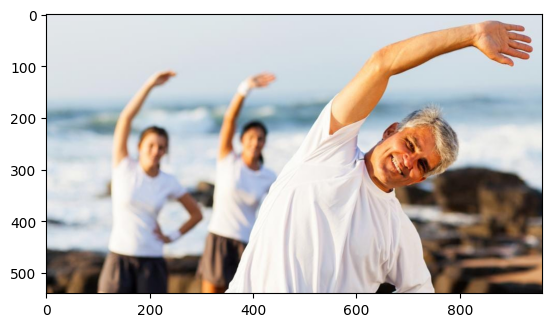

In [84]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # ploting Image using matplotlib ------->>
plt.show()

In [85]:
# REMOVING DODGY IMAGES ----->>>

for image_class in os.listdir(data_dir):  # happy or sad --->>
    for image in os.listdir(os.path.join(data_dir, image_class)): # images in image_class --->>
        image_path = os.path.join(data_dir, image_class, image) # every single image path ---->>>
        try:
            img = cv2.imread(image_path) # reading image as a numpy array -------->>>>
            tip = imghdr.what(image_path) # provide extension of image ------>>>
            if tip not in image_exts:                # checking image extension is present in image_ext or not ---------->>
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)            # if not so remove -------->>
        except Exception as e:                      # else raise exception ------->>>
            print('Issue with image {}'.formate(image_path))

    1.3 Load Data Using tensorflow ---->>>

        # tf.kears.utils.image_dataset_from_directory()  -->> helps to load data from a directory and provide many facilities.

        #  image_dataset_from_directory() == >> automatically create labels for each image based on the name of the directory and do bunch of processing for us and we use keras for it as above mentioned.

In [86]:
data = tf.keras.utils.image_dataset_from_directory('Data') # building Data pipeline ---->>

Found 172 files belonging to 2 classes.


In [87]:
data_iterator = data.as_numpy_iterator() # converting into numpy array ---->>> and accessing the data.as_numpy_iterator

In [88]:
# get another batch from iterators ---->>
batch = data_iterator.next() # grabing 1 batch pack --->>

In [89]:
len(batch) # so  2 represents images and labels (1st images , 2nd labels)

2

In [90]:
# Images represented as numpy arrays --->>>
batch[0].shape      # 32 batch size ,  (256,256) size of image , 3 channels  

(32, 256, 256, 3)

In [91]:
batch[1]     # labels --->>

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

    Class 1 = SAD PPL -->>
    Class 0 = HAPPY PPL -->>

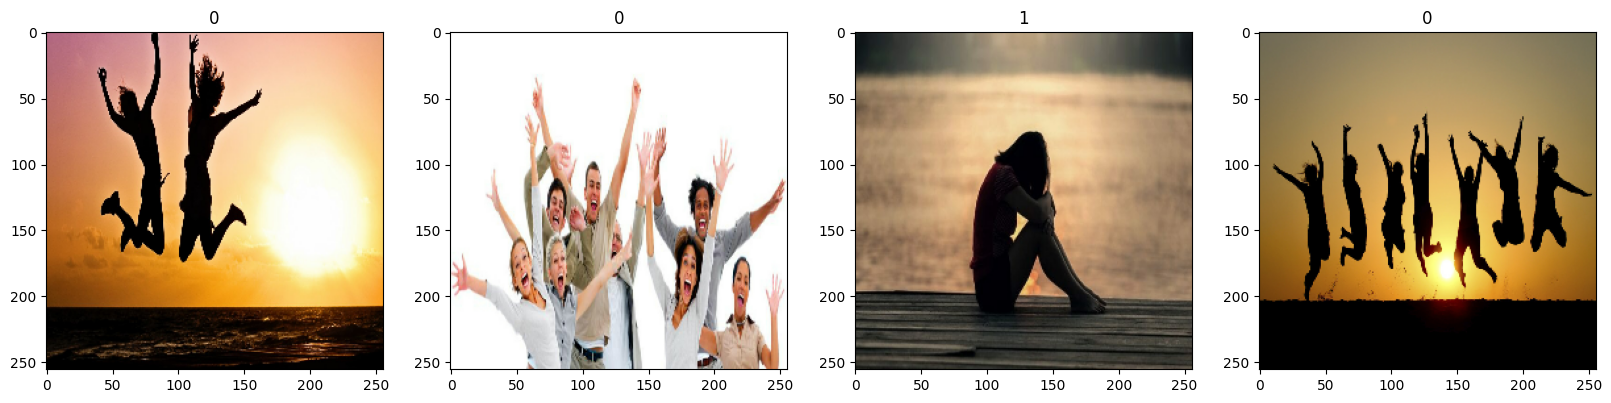

In [92]:
# plotted 4 image --->>

fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data --->>

    Scale Data ------>>>>

In [93]:
data = data.map(lambda x, y: (x/255 , y))    # Scaling images_(x) from [ 0 to 255 ] to  [ 0 to 1 ] and y is labels --->>

In [94]:
scaled_iterator = data.as_numpy_iterator()

In [95]:
batch = scaled_iterator.next()

In [96]:
batch[0].min()

0.0

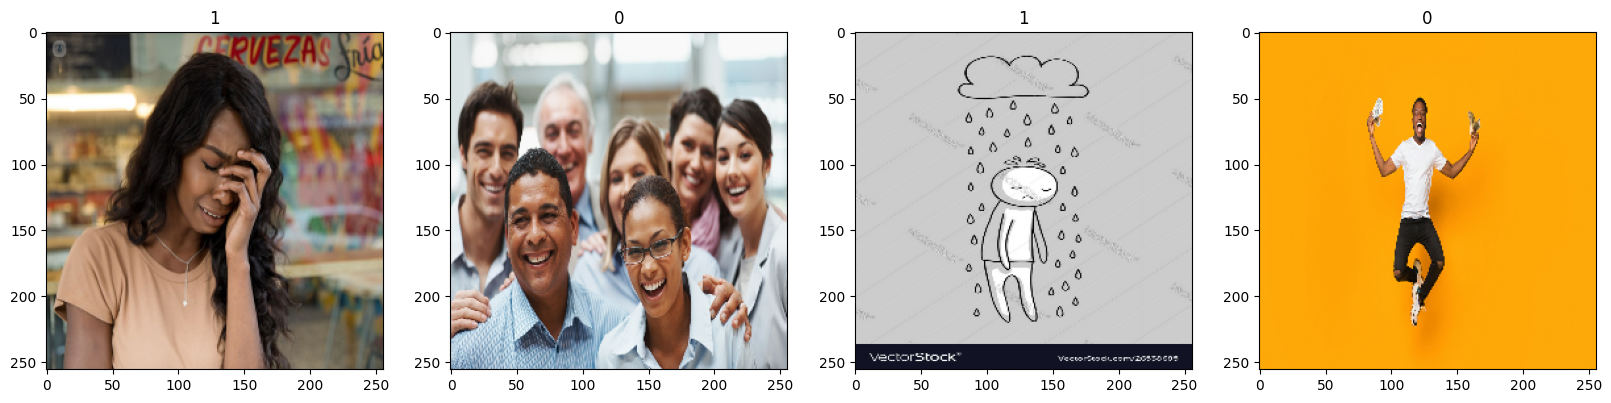

In [97]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

    Split Data -------->>>

In [98]:
len(data)

6

In [111]:
train_size = int(len(data)*.7)-1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [116]:
train_size+test_size+val_size

6

In [117]:
# Spliting Data into train , test , val ------>>
# how data we are going to take in a particular partition ---->>

train = data.take(train_size) 
val = data.skip(train_size).take(val_size) # 
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning Model ------->>>

     Build Deep Learning Model ---->>

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [123]:
model = Sequential()

In [124]:
# Buliding CNN Architecture --->>
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))  # [ 16_filters of shape 3,3 , 1_stride ] and [ image shape 256,256, 3_channels ] --->>
model.add(MaxPooling2D()) # maxpooling ( extract maximum value )---->>

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())   # flatting CNN layer  ----->

model.add(Dense(256, activation='relu')) # fully connected network ---->>
model.add(Dense(1, activation='sigmoid'))

In [125]:
# Compiling Model , Adam optimizer  , Loss function , accuracy ----->>
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [126]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

    Training --------------->>>>>
    

In [127]:
logdir = 'logs'

In [128]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [129]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 10s 2s/step - loss: 0.7365 - accuracy: 0.5000 - val_loss: 0.6631 - val_accuracy: 0.8125
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 0.6650 - accuracy: 0.7396 - val_loss: 0.5894 - val_accuracy: 0.8281
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.6954 - accuracy: 0.6354 - val_loss: 0.5957 - val_accuracy: 0.5469
Epoch 4/20
3/3 [==============================] - 5s 2s/step - loss: 0.5797 - accuracy: 0.6771 - val_loss: 0.5748 - val_accuracy: 0.7812
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 0.5754 - accuracy: 0.7917 - val_loss: 0.4856 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 5s 2s/step - loss: 0.4989 - accuracy: 0.8333 - val_loss: 0.3953 - val_accuracy: 0.7969
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.4688 - accuracy: 0.8125 - val_loss: 0.3816 - val_accuracy: 0.8438
Epoch 8/20
3/3 [========================

# Plot Performance ---->>

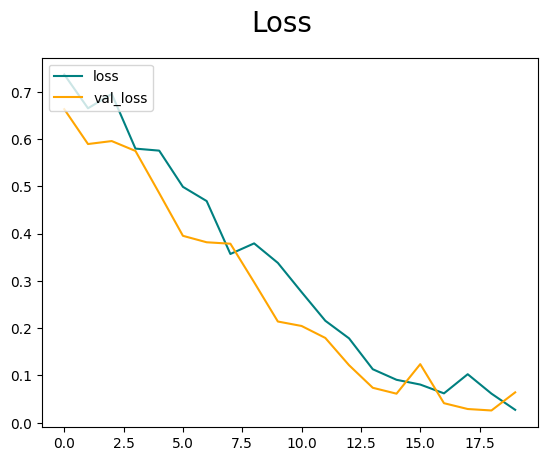

In [132]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

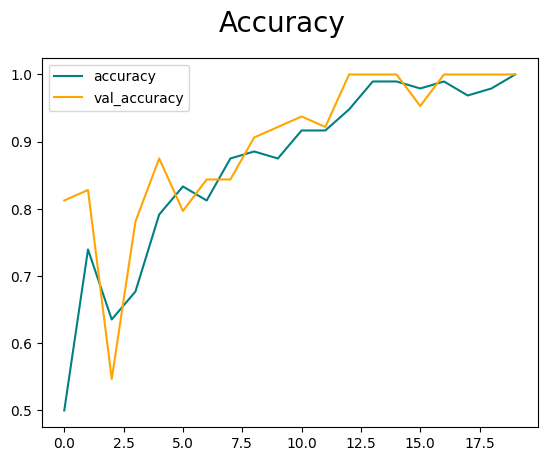

In [133]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance --->>

In [134]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [135]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [136]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 193ms/step


In [137]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


     TEST ---->>

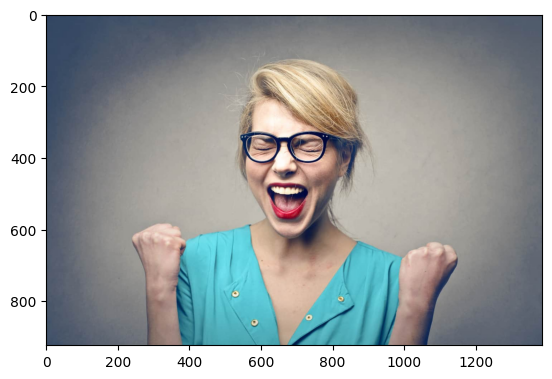

In [207]:
img = cv2.imread('Happy-women.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

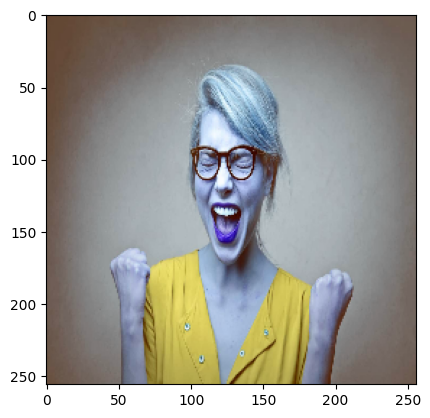

In [208]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [209]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # 0 is an axis --->>

1/1 [==============================] - 0s 47ms/step


In [210]:
yhat

array([[0.00596634]], dtype=float32)

In [211]:
if yhat > 0.5:
    print("Predicted class is sad")
else:
    print("Predicted class is Happy")

Predicted class is Happy


# SAVE MODEL --->>>

In [163]:
from tensorflow.keras.models import load_model

In [164]:
model.save(os.path.join('models', 'happymodel.h5'))

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [165]:
new_model = load_model(os.path.join('models', 'happymodel.h5'))

In [166]:
new_model